<a href="https://colab.research.google.com/github/raphasandes/spotify-hit-prediction/blob/main/Ana%CC%81lise_explorato%CC%81ria_Classifica%C3%A7%C3%A3o_de_Dados_SpotiFy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Análise Exploratória - Classificaçao de Dados**

In [2]:
#Importando bibliotecas a serem utilizadas
import pandas as pd
import numpy as np

In [3]:
#Abrir os datasets do projetos (anos 90, 2000 e 20100
df_90 = pd.read_csv("dataset-of-90s.csv")
df_00 = pd.read_csv("dataset-of-00s.csv")
df_10 = pd.read_csv("dataset-of-10s.csv")

In [4]:
#Concatenando todos os datasets em um único dataset, para facilitar o trabalho de treinamento do modelo
df_final = pd.concat([df_90, df_00, df_10])

In [5]:
#Verificando se a concatenação deu certo
df_final.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


In [6]:
#Verificando a quantidade de entradas (linhas)
df_final.shape

(17790, 19)

In [7]:
#"Target" é a informação essencial do dataset em termos de verificar se a música foi hit ou não. Neste caso, é necessário checar se esta informação está presente em todas as entradas.
df_final["target"].isnull().sum()

np.int64(0)

In [8]:
#Verificando a quantidade de dados que são hits
df_final["target"].value_counts(normalize=True)

,proportion
target,
0,0.5
1,0.5


In [9]:
#Removendo duplicatas
df_final = df_final.drop_duplicates(subset=["track", "artist"])

In [10]:
#Verificação do dataset após remoção das duplicatas
df_final.shape

(17362, 19)

In [11]:
#Verificando novamente a distribuição de dados
df_final["target"].value_counts(normalize=True) * 100

,proportion
target,
1,50.224628
0,49.775372


In [12]:
#Verificando os tipos dos atributos, caso seja necessário fazer alguma mudança
df_final.dtypes

,0
track,object
artist,object
uri,object
danceability,float64
energy,float64
key,int64
loudness,float64
mode,int64
speechiness,float64
acousticness,float64


In [13]:
#Verificando se não há dados faltantes
df_final.isnull().sum()

,0
track,0
artist,0
uri,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0
acousticness,0


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
#Verificando correlação entre os atributos
corr_df = df_final.select_dtypes("number").corr()
corr_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,1.000000,0.079547,0.020302,0.267515,-0.056397,0.187636,-0.194841,-0.349111,-0.109281,0.535457,-0.118716,-0.115242,0.177744,-0.066383,-0.090907,0.431556
energy,0.079547,1.000000,0.021120,0.773543,-0.008728,0.131180,-0.733336,-0.249619,0.201618,0.291144,0.206553,-0.088570,0.172705,-0.006720,-0.132499,0.117765
key,0.020302,0.021120,1.000000,0.007618,-0.153838,0.027905,-0.022199,-0.017270,-0.002199,0.019862,-0.003238,0.009676,-0.002717,0.003174,0.001698,0.018331
loudness,0.267515,0.773543,0.007618,1.000000,0.016656,0.114683,-0.641656,-0.453169,0.105401,0.279348,0.166995,-0.131400,0.181857,-0.037466,-0.152349,0.325587
mode,-0.056397,-0.008728,-0.153838,0.016656,1.000000,-0.078042,0.021148,-0.052902,0.003108,-0.001089,0.024613,-0.049147,0.009249,-0.020418,-0.037367,0.037270
speechiness,0.187636,0.131180,0.027905,0.114683,-0.078042,1.000000,-0.106344,-0.125366,0.137592,0.072458,0.037671,-0.029736,0.037711,-0.003131,-0.020936,0.070972
acousticness,-0.194841,-0.733336,-0.022199,-0.641656,0.021148,-0.106344,1.000000,0.282381,-0.097353,-0.177628,-0.159021,0.051123,-0.178735,0.009614,0.093083,-0.260632
instrumentalness,-0.349111,-0.249619,-0.017270,-0.453169,-0.052902,-0.125366,0.282381,1.000000,-0.039401,-0.296400,-0.040159,0.138729,-0.113558,0.082667,0.099897,-0.467519
liveness,-0.109281,0.201618,-0.002199,0.105401,0.003108,0.137592,-0.097353,-0.039401,1.000000,-0.010216,0.034006,0.000114,0.017876,0.045560,-0.024413,-0.081944
valence,0.535457,0.291144,0.019862,0.279348,-0.001089,0.072458,-0.177628,-0.296400,-0.010216,1.000000,0.039768,-0.174687,0.140427,-0.070973,-0.130453,0.214187


<Axes: >

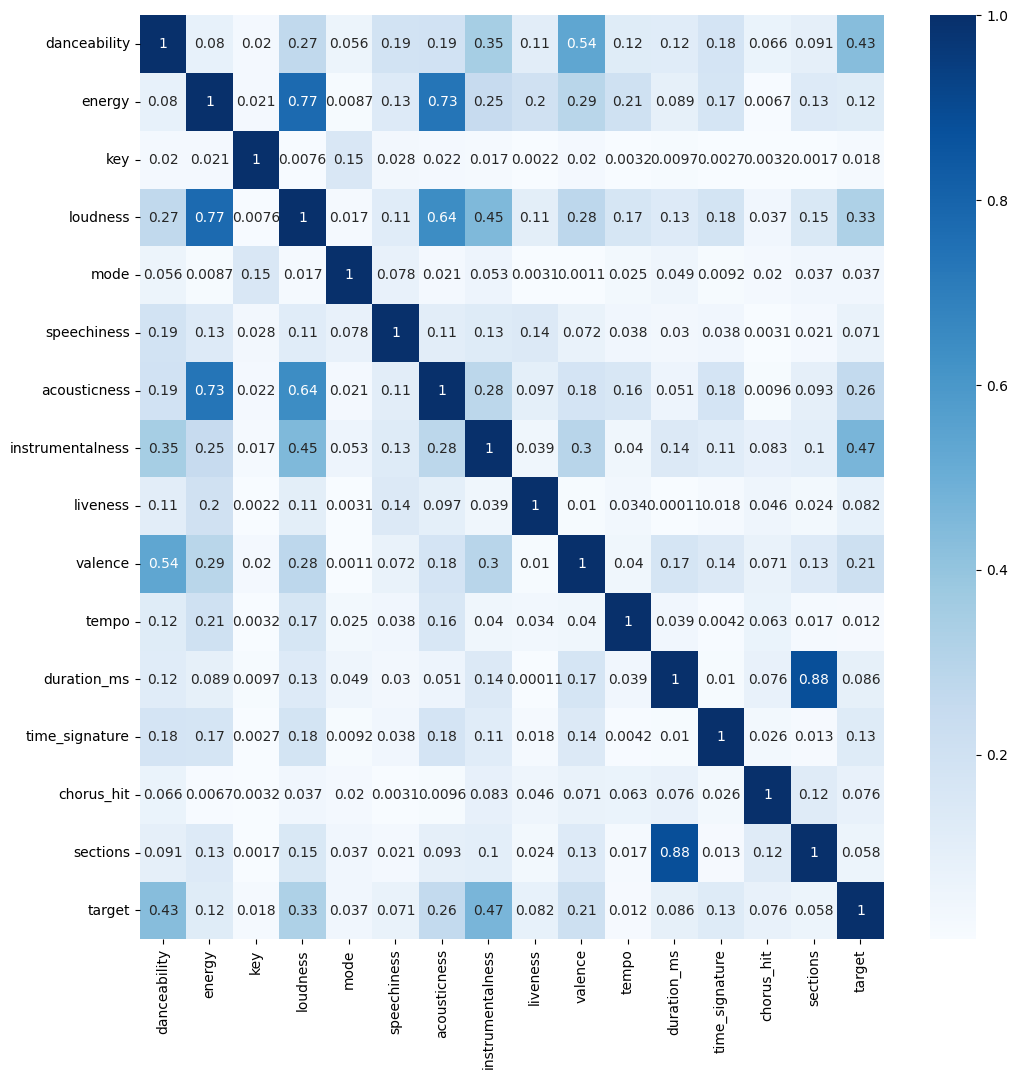

In [16]:
#Criando gráfico de calor sintetizando a relação entre os atributos
fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(corr_df.abs(), cmap="Blues", annot=True)

In [17]:
#Análise de colunas
df_final.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

In [18]:
#Separando dataset por features
Features = ['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections']

Target = "target"

In [19]:
#Separando o dataset em dois novos datasets, a partir das features anteriores
X = df_final[Features]
y = df_final[Target]

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
#Separando os conjuntos que serão base para o treinamento: train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
#Verificando a distribuição entre os conjuntos
print("Features X_train", X_train.shape)
print("Features X_test", X_test.shape)

print("Target y_train", y_train.shape)
print("Target y_test", y_test.shape)

Features X_train (12153, 15)
Features X_test (5209, 15)
Target y_train (12153,)
Target y_test (5209,)


In [23]:
#Separando novamente em conjuntos, agora em conjunto de teste e conjunto de validação
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [24]:
#Checando como ficou os novos conjuntos após a separação
print(X_val.shape)
print(X_test.shape)

(2604, 15)
(2605, 15)


**Validação cruzada**

In [25]:
from sklearn.model_selection import KFold

In [26]:
#Utilizando o método de validação KFold (Cross Validation)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [27]:
#Separando novamente os conjuntos que serão base para o treinamento: train e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [28]:
#Separando os dados que serão utilizados nos testes
for train_index, test_index in kfold.split(X_train):
  X_train_fold = X_train.iloc[train_index]
  y_train_fold = y_train.iloc[train_index]

  X_test_fold = X_train.iloc[test_index]
  y_test_fold = y_train.iloc[test_index]

**Primeiro Treinamento de Modelo: Regressão Logística**

Pré-processamento

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_train.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections
0,0.347264,0.454259,0.000000,0.785451,0.0,0.015203,0.758032,0.624248,0.256148,0.289157,0.214131,0.025285,0.75,0.149573,0.012658
1,0.188927,0.931908,0.818182,0.895841,1.0,0.069165,0.000011,0.000002,0.106557,0.152610,0.535666,0.065448,0.75,0.225498,0.056962
2,0.599311,0.543380,0.454545,0.851011,1.0,0.376874,0.007791,0.000033,0.379098,0.486948,0.778995,0.057407,0.75,0.176967,0.056962
3,0.755493,0.825764,0.727273,0.912247,1.0,0.211991,0.092671,0.000571,0.232582,0.430723,0.310852,0.045089,0.75,0.285022,0.050633
4,0.800732,0.543380,0.454545,0.807389,1.0,0.073876,0.566265,0.000000,0.105533,0.536145,0.530036,0.072918,0.75,0.331427,0.056962


In [30]:
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

Regressão Logística

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
model = LogisticRegression(random_state=42)
model

LogisticRegression(random_state=42)

In [33]:
model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [34]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
pd.Series(y_pred).value_counts(normalize=True)

,proportion
1,0.584373
0,0.415627


Parâmetros para verificar se o treinamento funcionou

In [36]:
#Acurácia
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.7928585141101939

In [37]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77      2606
           1       0.75      0.88      0.81      2603

    accuracy                           0.79      5209
   macro avg       0.80      0.79      0.79      5209
weighted avg       0.80      0.79      0.79      5209



k-NN

In [38]:
#Importando o módulo para treino
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

In [39]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [40]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76      2606
           1       0.75      0.86      0.80      2603

    accuracy                           0.78      5209
   macro avg       0.79      0.78      0.78      5209
weighted avg       0.79      0.78      0.78      5209



**Árvore de Decisão**

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
#Treinamento completo de Árvore de Decisão
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.75      0.75      0.75      2606
           1       0.75      0.76      0.75      2603

    accuracy                           0.75      5209
   macro avg       0.75      0.75      0.75      5209
weighted avg       0.75      0.75      0.75      5209



In [43]:
#Treinamento completo de Árvore de Decisão, utilizando o código acima, mas acrescentando o critério de entropia e profundidade
model = DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth=7)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.76      0.80      2606
           1       0.78      0.86      0.82      2603

    accuracy                           0.81      5209
   macro avg       0.81      0.81      0.81      5209
weighted avg       0.81      0.81      0.81      5209



In [44]:
#Verificando possível overfit
y_pred_train = model.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82      6036
           1       0.80      0.88      0.84      6117

    accuracy                           0.83     12153
   macro avg       0.83      0.83      0.83     12153
weighted avg       0.83      0.83      0.83     12153



**Random Forest**

In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model = RandomForestClassifier(random_state = 42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      2606
           1       0.81      0.88      0.84      2603

    accuracy                           0.83      5209
   macro avg       0.83      0.83      0.83      5209
weighted avg       0.83      0.83      0.83      5209



In [47]:
#Ajustando os parâmetros para que o resultado seja ainda melhor
model = RandomForestClassifier(n_estimators=50, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      2606
           1       0.81      0.88      0.84      2603

    accuracy                           0.84      5209
   macro avg       0.84      0.84      0.84      5209
weighted avg       0.84      0.84      0.84      5209



**Gradient Blosting**

In [48]:
from sklearn.ensemble import GradientBoostingClassifier

In [49]:
model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [50]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82      2606
           1       0.79      0.89      0.84      2603

    accuracy                           0.83      5209
   macro avg       0.83      0.83      0.83      5209
weighted avg       0.83      0.83      0.83      5209



In [51]:
#Ajustando parâmetros
model = GradientBoostingClassifier(random_state=42, learning_rate=0.05)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81      2606
           1       0.79      0.89      0.84      2603

    accuracy                           0.83      5209
   macro avg       0.83      0.83      0.83      5209
weighted avg       0.83      0.83      0.83      5209



**Comparação de modelos**

In [52]:
from sklearn.neural_network import MLPClassifier

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "k-NN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Neural_Network": MLPClassifier(random_state=42)
}

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
results_mean = []
results_std = []
results_names = []

for model_name, model in models.items():
  print(model_name)

  cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy")

  results_mean.append(cv_scores.mean())
  results_std.append(cv_scores.std())
  results_names.append(model_name)

Logistic Regression
k-NN
Decision Tree
Random Forest
Gradient Boosting
Neural_Network


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptro

In [55]:
df_results = pd.DataFrame({
    "Modelo": results_names,
    "Acurácia Média": results_mean,
    "Acurácia Std": results_std,
})

df_results

,Modelo,Acurácia Média,Acurácia Std
0,Logistic Regression,0.794126,0.007545
1,k-NN,0.783922,0.003885
2,Decision Tree,0.756604,0.007173
3,Random Forest,0.835103,0.008217
4,Gradient Boosting,0.831318,0.008249
5,Neural_Network,0.820046,0.007866


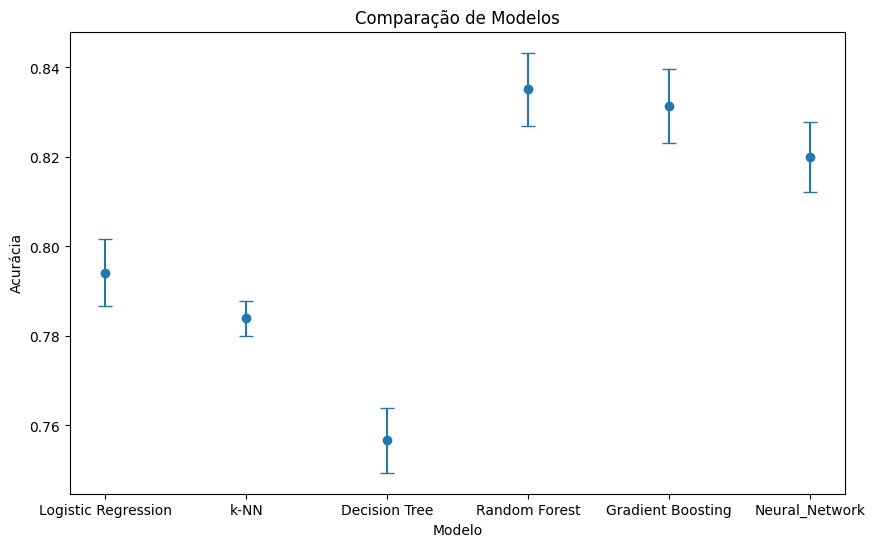

In [56]:
#Criação de gráfico de comparação de modelos
plt.figure(figsize=(10,6))
plt.errorbar(df_results["Modelo"], df_results["Acurácia Média"], yerr=df_results["Acurácia Std"], fmt="o", capsize=5)
plt.ylabel("Acurácia")
plt.xlabel("Modelo")
plt.title("Comparação de Modelos")
plt.show()

**Visualização de Dados**

/tmp/ipython-input-3553220641.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df_final, palette='viridis')
/tmp/ipython-input-3553220641.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df_final, palette='viridis')
/tmp/ipython-input-3553220641.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=col, data=df_final, palette='viridis')
/tmp/ipython-input-3553220641.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.

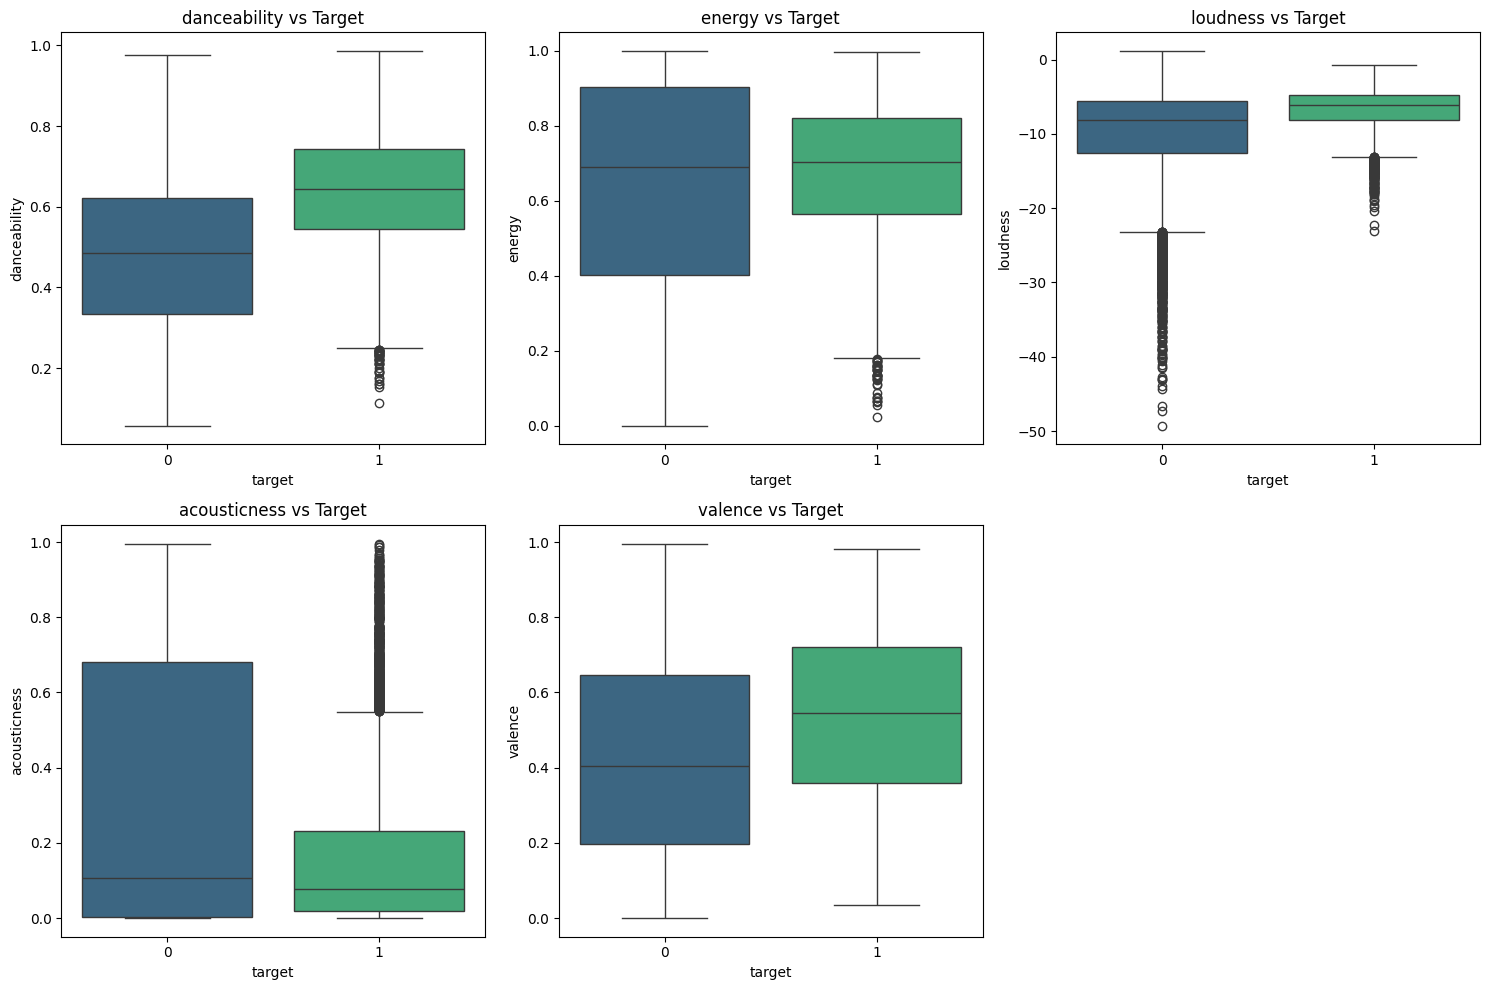

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionando algumas colunas principais para comparar
features_to_plot = ['danceability', 'energy', 'loudness', 'acousticness', 'valence']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='target', y=col, data=df_final, palette='viridis')
    plt.title(f'{col} vs Target')

plt.tight_layout()
plt.show()

**Avaliação Final Completa**

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Selecionando apenas colunas numéricas para o modelo
# Removemos colunas de texto (track, artist, uri) que o modelo não processa diretamente
X = df_final.drop(['track', 'artist', 'uri', 'target'], axis=1)
y = df_final['target']

# 2. Divisão de dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [61]:
# 3. Treino do modelo Random Forest
print("Treinando o modelo... aguarde.")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

Treinando o modelo... aguarde.


RandomForestClassifier(random_state=42)

In [62]:
# 4. Predição e Avaliação
y_pred = rf_model.predict(X_test)

print("\n=== RESULTADOS DO MODELO ===")
print(f"Acurácia Geral: {accuracy_score(y_test, y_pred):.2%}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))



=== RESULTADOS DO MODELO ===
Acurácia Geral: 83.27%

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1719
           1       0.81      0.88      0.84      1754

    accuracy                           0.83      3473
   macro avg       0.84      0.83      0.83      3473
weighted avg       0.84      0.83      0.83      3473



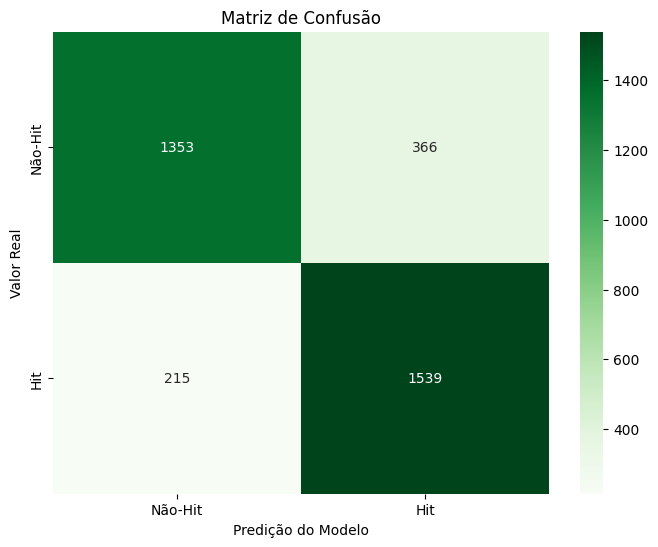

In [64]:
# 5. Matriz de Confusão Visual
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=['Não-Hit', 'Hit'], yticklabels=['Não-Hit', 'Hit'])
plt.xlabel('Predição do Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()



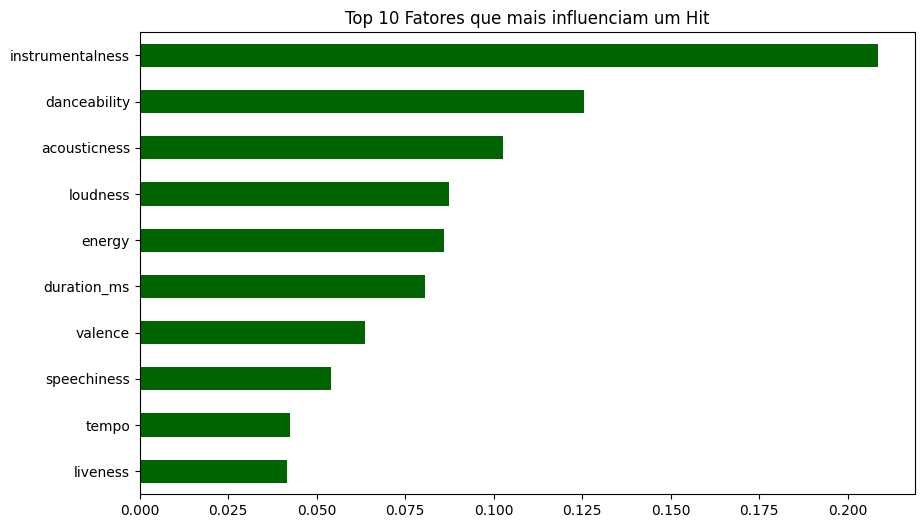

In [65]:
# 6. Importância das Características
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values().plot(kind='barh', color='darkgreen')
plt.title('Top 10 Fatores que mais influenciam um Hit')
plt.show()